In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the iris dataset
iris = datasets.load_iris()

# Assign the Petal Length and Width to the Matrix X
X = iris['data'][:,[2,3]]

# Get the target labels
y = iris['target']

# Check the Unique values
np.unique(y)

array([0, 1, 2])

The np.unique(y) function returned the three unique class labels stored in iris.target, and as we
can see, the Iris flower class names, Iris-setosa, Iris-versicolor, and Iris-virginica, are already
stored as integers (here: 0, 1, 2). `Although many scikit-learn functions and class methods also work with class labels in string format, using integer labels is a recommended approach to avoid technical glitches and improve computational performance due to a smaller memory footprint; furthermore, encoding class labels as integers is a common convention among most machine learning libraries.`

In [4]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Note that the `train_test_split` function already shuffles the training datasets internally before splitting; otherwise, all examples from class 0 and class 1 would have ended up in the training datasets, and the test dataset would consist of 45 examples from class 2. Also, take advantage of the built-in support for stratification via s`tratify=y.`

In [5]:
print(f'Label counts in y: {np.bincount(y)}')

print(f'Label counts in y_train: {np.bincount(y_train)}')

print(f'Label counts in y_test: {np.bincount(y_test)}')

Label counts in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_test: [15 15 15]


Many machine learning and optimization algorithms also require feature scaling for optimal performance, hence lets standardize the features using `StandardScaler`.

In [6]:
# Initialize the Standard Scaler
sc = StandardScaler()

# Standardize the Features
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

> Using the preceding code, we loaded the StandardScaler class from the preprocessing module and
initialized a new StandardScaler object that we assigned to the sc variable. Using the fit method,
StandardScaler estimated the parameters, 𝜇𝜇 (sample mean) and 𝜎𝜎 (standard deviation), for each
feature dimension from the training data. By calling the transform method, we then standardized
the training data using those estimated parameters, 𝜇𝜇 and 𝜎𝜎 . Note that we used the same scaling parameters to standardize the test dataset so that both the values in the training and test dataset are comparable with one another.

## Training the Perceptron

After loading the Perceptron class from the linear_model module, we initialized a new Perceptron object and trained the model via the fit method.

In [7]:
# Initialize the Percepron Algorithm
ppn = Perceptron(eta0=0.1, random_state=1)

# Fit the Perceptron algorithm on the standardized training data
ppn.fit(X_train_std, y_train)

# Run the prediction on the test data
y_pred = ppn.predict(X_test_std)

# Print the mis-classified samples
print(f'Accuracy Score {accuracy_score(y_test, y_pred):.3f}')

Accuracy Score 0.889


> Note that standardization plays an important role in the accuracy score of the Perceptron algorithm

In [8]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='none', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s=100, label='Test set')

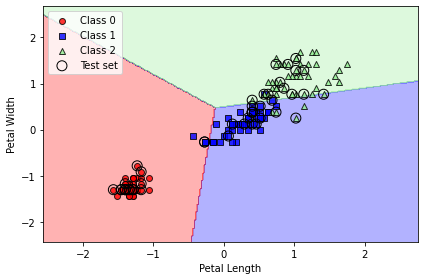

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))

y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))

plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Logistic Regression

Logistic regression is a classification model that is very easy to implement and performs very well on linearly separable classes. It is one of the most widely used algorithms for classification in industry. Similar to the perceptron and Adaline, the logistic regression model in this chapter is also a linear model for binary classification.

In the following code example, I will use the `sklearn.linear_model.LogisticRegression` class as well as the familiar fit method to train the model on all three classes in the standardized flower training dataset. Also, we set `multi_class='ovr'` for illustration purposes. As an exercise for the reader, you may want to compare the results with `multi_class='multinomial'`. Note that the multinomial setting is now the default choice in scikitlearn’s LogisticRegression class and recommended in practice for mutually exclusive classes, such as those found in the Iris dataset. 

Here, `“mutually exclusive”` means that each training example can only belong to a single class (in contrast to multilabel classification, where a training example can be
a member of multiple classes).

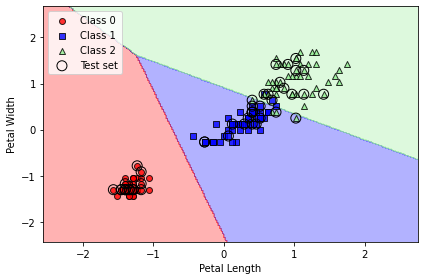

In [10]:
# Initialize the LR model
lr = LogisticRegression(C=100, solver='lbfgs', multi_class='ovr')

# Fit the model to the training data
lr.fit(X_train_std, y_train)

# plot_decision_regions
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# Predict Probabilities
lr.predict_proba(X_test_std[:3])

array([[3.21065553e-09, 4.41713907e-01, 5.58286090e-01],
       [2.57432296e-05, 9.59761535e-01, 4.02127219e-02],
       [2.19798476e-06, 6.60763001e-01, 3.39234801e-01]])

In [12]:
# Predict classes
lr.predict(X_test_std[:3])

array([2, 1, 1])

> Lastly, a word of caution if you want to predict the class label of a single flower example: scikit-learn expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy’s reshape method to add a new dimension, as demonstrated here:

In [13]:
lr.predict([X_test_std[1]])

array([1])

In [14]:
X_test_std[1].reshape(1,-1)

array([[0.51547131, 0.25106784]])

### Tackling Overfitting

Overfitting is a common problem in machine learning, where a model performs well on training data
but does not generalize well to unseen data (test data). If a model suffers from overfitting, we also say that the model has a high variance, which can be caused by having too many parameters, leading to a model that is too complex given the underlying data. Similarly, our model can also suffer from underfitting (high bias), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data.

> One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization. Regularization is a very useful method for handling collinearity (high correlation among features), filtering out noise from data, and eventually preventing overfitting.

> Regularization is another reason why feature scaling such as standardization is important.
For regularization to work properly, we need to ensure that all our features are on
comparable scales.

> The parameter, C, that is implemented for the LogisticRegression class in scikit-learn comes from
a convention in support vector machines. The term C is inversely proportional to the regularization parameter, 𝜆 . Consequently, decreasing the value of the inverse regularization parameter, C, means that we are increasing the regularization strength.

## Maximum Margin Classification with Support Vector Machines

Another powerful and widely used learning algorithm is the support vector machine (SVM), which
can be considered an extension of the perceptron. Using the perceptron algorithm, we minimized
misclassification errors. However, in SVMs, our optimization objective is to maximize the margin.
The margin is defined as the distance between the separating hyperplane (decision boundary) and
the training examples that are closest to this hyperplane, which are the so-called support vectors.


The use of the slack variable, in turn, introduces the variable, which is commonly referred to as C in SVM contexts. We can consider C as a hyperparameter for controlling the penalty for misclassification.
Large values of C correspond to large error penalties, whereas we are less strict about misclassification errors if we choose smaller values for C. We can then use the C parameter to control the width of the margin and therefore tune the bias-variance tradeoff,

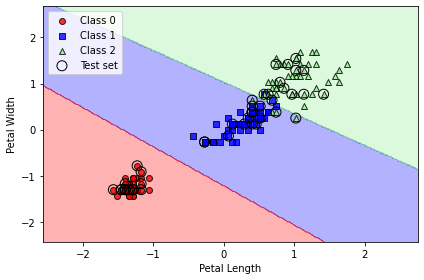

In [15]:
# Initialize the SVC
svc = SVC(kernel='linear', C=1, random_state=1)

svc.fit(X_train_std, y_train)

# plot_decision_regions
plot_decision_regions(X_combined_std, y_combined, classifier=svc, test_idx=range(105, 150))

plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

> In practical classification tasks, linear logistic regression and linear SVMs often yield very
similar results. Logistic regression tries to maximize the conditional likelihoods of the
training data, which makes it more prone to outliers than SVMs, which mostly care about
the points that are closest to the decision boundary (support vectors). On the other hand,
logistic regression has the advantage of being a simpler model and can be implemented
more easily, and is mathematically easier to explain. Furthermore, logistic regression
models can be easily updated, which is attractive when working with streaming data.

> However, sometimes
our datasets are too large to fit into computer memory. Thus, scikit-learn also offers alternative implementations via the SGDClassifier class, which also supports online learning via the partial_fit
method. The concept behind the SGDClassifier. We could initialize the SGD version of the perceptron (loss='perceptron'), logistic regression
(loss='log'), and an SVM with default parameters (loss='hinge'), as follows:

```
from sklearn.linear_model import SGDClassifier
>>> ppn = SGDClassifier(loss='perceptron')
>>> lr = SGDClassifier(loss='log')
>>> svm = SGDClassifier(loss='hinge')
```

### Solving Non-Linear Classification Problems using a Kernel SVM

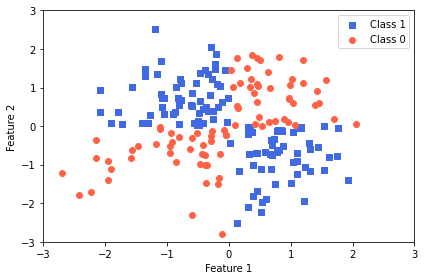

In [16]:
# Creating a non-linear dataset

np.random.seed(1)

X_or = np.random.randn(200,2)

X_xor = np.random.randn(200,2)

y_xor = np.logical_xor(X_xor[:,0] > 0, 
                       X_xor[:,1] > 0)

y_xor = np.where(y_xor, 1, 0)

# Plot the Positive classes
plt.scatter(X_xor[y_xor == 1, 0],
                X_xor[y_xor == 1, 1],
                c='royalblue', marker='s',
                label='Class 1')

# Plot the Negative Classes
plt.scatter(X_xor[y_xor == 0, 0],
                X_xor[y_xor == 0, 1],
                c='tomato', marker='o',
                label='Class 0')


plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Obviously, we would not be able to separate the examples from the positive and negative class very
well using a linear hyperplane as a decision boundary via the linear logistic regression or linear SVM model that we discussed in earlier sections.


The basic idea behind kernel methods for dealing with such linearly inseparable data is to create
nonlinear combinations of the original features to project them onto a higher-dimensional space via
a mapping function, 𝜙, where the data becomes linearly separable.

## Using the kernel trick to find separating hyperplanes in a high-dimensional space

To solve a nonlinear problem using an SVM, we would transform the training data into a higher-dimensional feature space via a mapping function, 𝜙, and train a linear SVM model to classify the data in this new feature space. Then, we could use the same mapping function, 𝜙, to transform new, unseen data to classify it using the linear SVM model.

However, one problem with this mapping approach is that the construction of the new features is
computationally very expensive, especially if we are dealing with high-dimensional data. This is where the so-called kernel trick comes into play.

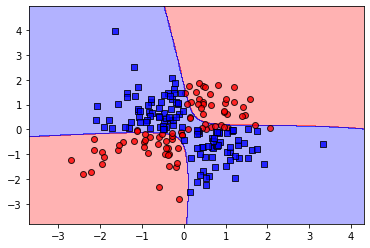

In [17]:
# Initialize the SVClassifier
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10)

# fit to the data
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)


> The `𝛾` parameter, which we set to gamma=0.1, can be understood as a cut-off parameter for the Gaussian sphere. If we increase the value for 𝛾𝛾 , we increase the influence or reach of the training examples, which leads to a tighter and bumpier decision boundary. To get a better understanding of `𝛾` , let’s apply an RBF kernel SVM to our Iris flower dataset:

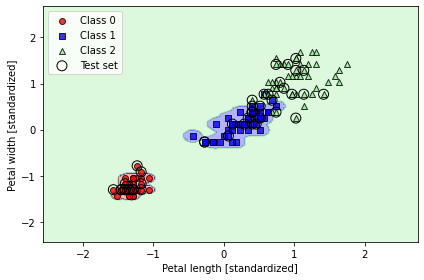

In [18]:
# Apply the kernel based SV Classifier
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)

svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

> Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. This illustrates that the `𝛾` parameter also plays an important role in controlling overfitting or variance when the algorithm is too sensitive to fluctuations in the training dataset.

## Decision Tree Learning

Decision tree classifiers are attractive models if we care about interpretability. As the name “decision tree” suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions.

> Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG), which will be explained in more detail in the following section. In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the training examples at each node all belong to the same class. In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we typically want to prune the tree by setting a limit for the maximum depth of the tree.

> Decision trees can build complex decision boundaries by dividing the feature space into rectangles. However, we have to be careful since the deeper the decision tree, the more complex the decision boundary becomes, which can easily result in overfitting. Using scikit-learn, we will now train a decision tree with a maximum depth of 4, using the Gini impurity as a criterion for impurity. Although feature scaling may be desired for visualization purposes, note that feature scaling is not a requirement for decision tree algorithms.

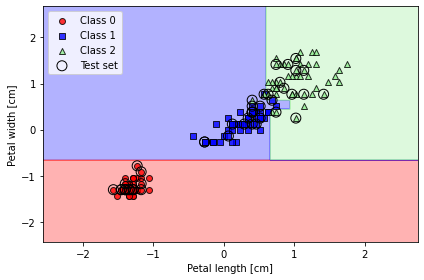

In [19]:
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1
                                    )

tree_model.fit(X_train_std, y_train)

X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                        y_combined,
                        classifier=tree_model,
                        test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Combining Multiple Decision Trees via Random Forests

Ensemble methods have gained huge popularity in applications of machine learning during the last
decade due to their good classification performance and robustness toward overfitting.

A random forest can be considered as an ensemble of decision trees. The idea behind a random forest is to average multiple (deep) decision trees that individually suffer from high variance to build a more robust model that has a better generalization performance and is less susceptible to overfitting.

Although random forests don’t offer the same level of interpretability as decision trees, a big advantage of random forests is that we don’t have to worry so much about choosing good hyperparameter values. We typically don’t need to prune the random forest since the ensemble model is quite robust to noise from averaging the predictions among the individual decision trees. The only parameter that we need to care about in practice is the number of trees, k, (step 3) that we choose for the random forest.
Typically, the larger the number of trees, the better the performance of the random forest classifier at the expense of an increased computational cost.

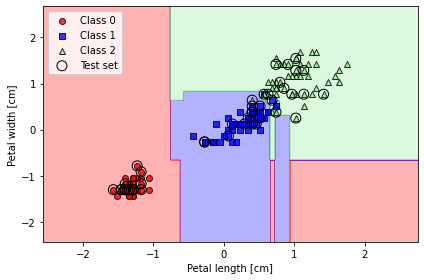

In [20]:
# Instantiate the RF
rf = RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

rf.fit(X_train_std, y_train)

plot_decision_regions(X_combined,
                        y_combined,
                        classifier=rf,
                        test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

> Using the preceding code, we trained a random forest from 25 decision trees via the n_estimators
parameter. By default, it uses the Gini impurity measure as a criterion to split the nodes. Although
we are growing a very small random forest from a very small training dataset, we used the n_jobs parameter for demonstration purposes, which allows us to parallelize the model training using multiple cores of our computer

## K-nearest Neighbors

KNN is a typical example of a lazy learner. It is called “lazy” not because of its apparent simplicity, but because it doesn’t learn a discriminative function from the training data but memorizes the training dataset instead.

The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:
1. Choose the number of k and a distance metric
2. Find the k-nearest neighbors of the data record that we want to classify
3. Assign the class label by majority vote

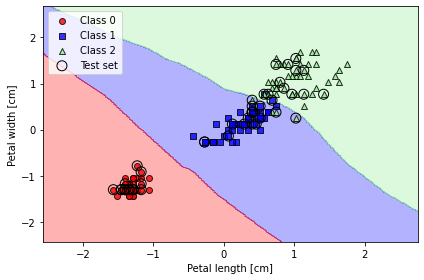

In [21]:
# Instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski'
                           )

knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined,
                        y_combined,
                        classifier=knn,
                        test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

>The right choice of k is crucial to finding a good balance between overfitting and underfitting. We also have to make sure that we choose a distance metric that is appropriate for the features in the dataset. Often, a simple Euclidean distance measure is used for real-value examples, for example, the flowers in our Iris dataset, which have features measured in centimeters. However, if we are using a Euclidean distance measure, it is also important to standardize the data so that each feature contributes equally to the distance. The minkowski distance that we used in the previous code is just a generalization of the Euclidean and Manhattan distance.


Lastly, it is important to mention that KNN is very susceptible to overfitting due to the curse of dimensionality. The curse of dimensionality describes the phenomenon where the feature space becomes
increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. We can
think of even the closest neighbors as being too far away in a high-dimensional space to give a good
estimate.
We discussed the concept of regularization in the section about logistic regression as one way to avoid overfitting. However, in models where regularization is not applicable, such as decision trees and KNN, we can use feature selection and dimensionality reduction techniques to help us to avoid the curse of dimensionality.